In [1]:
%matplotlib inline
import pandas
import os
import sklearn.neighbors
import numpy
import seaborn
import matplotlib.pyplot as plt

In [2]:
treatments = pandas.read_csv("/data1/santiago/BBBC021/experiments/cnn/collapsed/Treatments.txt", sep='\t')

In [3]:
sym = ['A','B','C','D','E','F','G','H','I','J','K','L']

In [4]:
compounds = treatments["compound"].unique().tolist()
compounds.remove("DMSO")

In [5]:
moa = treatments["moa"].unique().tolist()
moa.remove("DMSO")
moa.sort()
treatments["moa_id"] = 0
for i in range(len(moa)):
    treatments.loc[treatments["moa"] == moa[i], "moa_id"] = i

In [6]:
all_predictions = []
all_truth = []
for compound in compounds:
    train = treatments[treatments["compound"] != compound]
    test = treatments[treatments["compound"] == compound]
    train_features = train.select_dtypes([numpy.number]).drop(["concentration", "moa_id"], axis=1).values
    test_features = test.select_dtypes([numpy.number]).drop(["concentration", "moa_id"], axis=1).values
    train_labels = train["moa_id"].values
    test_labels = test["moa_id"].values
    classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='correlation')
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    all_predictions += predictions.tolist()
    all_truth += test_labels.tolist()

In [7]:
correct = numpy.asarray(all_predictions) == numpy.asarray(all_truth)
accuracy = numpy.sum(correct) / len(correct)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Accuracy: 84.46601941747572%


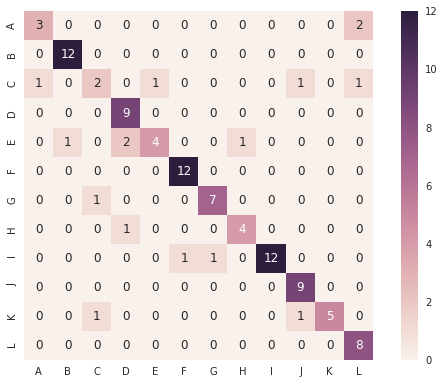

In [8]:
conf = sklearn.metrics.confusion_matrix(all_truth, all_predictions)
plot = seaborn.heatmap(conf, annot=True, square=True, xticklabels=sym, yticklabels=sym)
#plot.get_figure().savefig("/data1/santiago/BBBC021/experiments/cnn/cnn_confusion_matrix.png")
print("Accuracy: {}%".format(accuracy*100))
plt.tight_layout()